# PLOTAGEM DOS GRÁFICOS

In [1]:
from pandas import read_excel, to_datetime, Series
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from matplotlib.ticker import StrMethodFormatter

# Carregando a planilha
path = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\25.04.22.Dados.xlsx"
path_graphics = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\Gráficos"
df = read_excel(path, sheet_name="2025.04.22")

# Convertendo a coluna de data e organizando a série temporal
df['Timestamp'] = to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Frequência diária
serie = df['Camisetas_básicas_masculinas'].asfreq('D')

# Decomposição aditiva
decomposicao = sm.tsa.seasonal_decompose(serie, model='additive', period=30)

# Plotando os componentes: nível, tendência, sazonalidade e ruído
plt.figure(figsize=(12, 8))
decomposicao.plot()
plt.suptitle('Decomposição da Série Temporal - Vendas Diárias de Camisetas', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path_graphics, "decomposicao_series_temporais.png"))
plt.close()

# Plotando gráfico mensal
vendas_mensais = serie.resample('ME').sum() # agrupamento por mês

fig, ax = plt.subplots(figsize=(12, 6)) # criação do gráfico
barras = ax.bar(vendas_mensais.index.strftime('%b\n%Y'), vendas_mensais.values, color='white', edgecolor='black')
ax.set_facecolor('#2c2c2c')
fig.patch.set_facecolor('#2c2c2c')
ax.set_title('Volume de Vendas por Mês', fontsize=16, color='white')
ax.set_ylabel('Volumes Vendidos', color='white')

z = Series(vendas_mensais.values) # linha de tendência
coef = Series(range(len(z)))
ajuste = Series(Series(z).rolling(window=3, min_periods=1).mean())
ax.plot(vendas_mensais.index.strftime('%b\n%Y'), ajuste, color='orange', linewidth=2)

ax.tick_params(colors='white') # estética
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Salvar
plt.tight_layout()
plt.savefig(os.path.join(path_graphics, "grafico_mensal_vendas.png"))
plt.close()

<Figure size 1200x800 with 0 Axes>

# PREPARAÇÃO DOS DADOS

In [2]:
from pandas import read_excel

# Carregando a planilha
path2 = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\25.04.22.Dados.xlsx"
df2 = read_excel(path2, sheet_name="2025.04.22")

# 1. Verificar se existem linhas com valores faltantes
linhas_faltantes = df2[df2.isnull().any(axis=1)]

if linhas_faltantes.empty:
    print("✅ Todas as linhas estão completamente preenchidas.")
else:
    print("⚠️ Existem linhas com valores ausentes:")
    print(linhas_faltantes)

# 2. Verificar duplicatas na coluna de data
coluna_data = 'Timestamp' 
duplicatas_data = df2[df2.duplicated(subset=coluna_data, keep=False)]

if duplicatas_data.empty:
    print("✅ Não há valores repetidos na coluna de data.")
else:
    print("⚠️ Há valores repetidos na coluna de data:")
    print(duplicatas_data)

✅ Todas as linhas estão completamente preenchidas.
✅ Não há valores repetidos na coluna de data.


# MODELAGEM DOS DADOS


### Previsões para Novembro e Dezembro de 2024 ###

Previsões para Novembro/2024:
            Naive  Cumulativo  Média Móvel  Suavização Exp.
2024-11-01    412  208.289855   414.533333        396.74864
2024-11-02    412  208.289855   415.251111        396.74864
2024-11-03    412  208.289855   416.059481        396.74864
2024-11-04    412  208.289855   416.761464        396.74864
2024-11-05    412  208.289855   416.586846        396.74864
2024-11-06    412  208.289855   417.039741        396.74864
2024-11-07    412  208.289855   417.374399        396.74864
2024-11-08    412  208.289855   418.020213        396.74864
2024-11-09    412  208.289855   418.620886        396.74864
2024-11-10    412  208.289855   419.408249        396.74864
2024-11-11    412  208.289855   414.455191        396.74864
2024-11-12    412  208.289855   406.237031        396.74864
2024-11-13    412  208.289855   400.544932        396.74864
2024-11-14    412  208.289855   401.129763        396.74864
2024-11-15    412

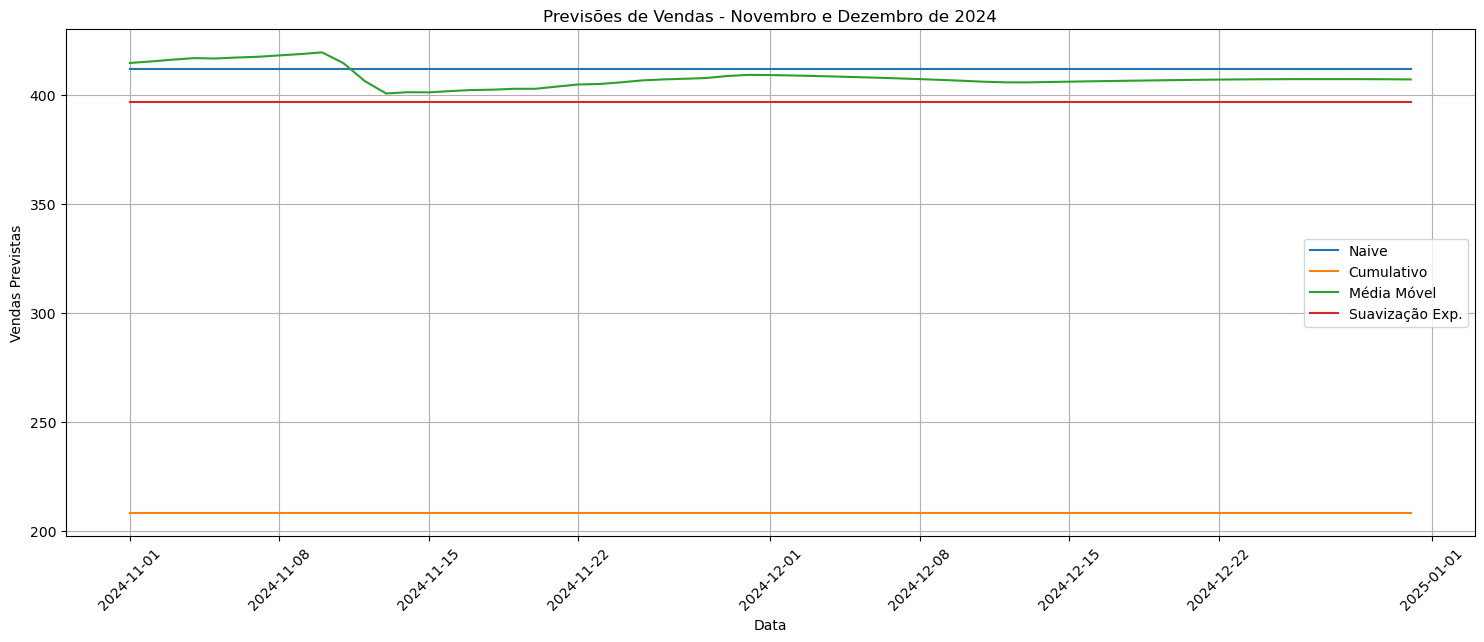

In [11]:
from pandas import read_excel, to_datetime, date_range, Series, DataFrame
import matplotlib.pyplot as plt

# Carregando os dados
path3 = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\25.04.22.Dados.xlsx"
df3 = read_excel(path3, sheet_name="2025.04.22")

# Garantindo que a coluna de data está no formato datetime
df3['Timestamp'] = to_datetime(df3['Timestamp'])

# Ordenando as datas
df3 = df3.sort_values('Timestamp')

# Definindo índice para cada coluna
df3.set_index('Timestamp', inplace=True)

# Separando os dados até outubro de 2024 (novembro como mês de treino)
df_treino = df3[df3.index < '2024-11-01']

# Gerando as datas de previsão (nov e dez)
datas_previstas = date_range(start="2024-11-01", end="2024-12-31", freq='D')

print("\n### Previsões para Novembro e Dezembro de 2024 ###")

# === Modelo Naive ===
ultimo_valor = df_treino['Camisetas_básicas_masculinas'].iloc[-1]
previsao_naive = Series(ultimo_valor, index=datas_previstas)


# === Modelo Cumulativo ===
media_diaria_total = df_treino['Camisetas_básicas_masculinas'].mean()
previsao_cumulativa = Series(media_diaria_total, index=datas_previstas)


# === Média Móvel (janela de k dias) ===
k = 30
serie_extendida = df_treino['Camisetas_básicas_masculinas'].copy().astype(float)
previsoes_mm = []

for Timestamp in datas_previstas:
    media_movel = serie_extendida.iloc[-k:].mean()
    previsoes_mm.append(media_movel)
    serie_extendida.loc[Timestamp] = media_movel
    
previsao_mm = Series(previsoes_mm, index=datas_previstas)


# === 4. Suavização Exponencial ===
alpha = 0.3
serie_exp_real = df_treino['Camisetas_básicas_masculinas'].copy().astype(float)
S_anterior = serie_exp_real.ewm(alpha=alpha, adjust=False).mean().iloc[-1]  # último valor suavizado real

previsoes_exp_dinamica = []

for Timestamp in datas_previstas:
    S_novo = alpha * S_anterior + (1 - alpha) * S_anterior  # equivalente a manter suavização com input previsto
    previsoes_exp_dinamica.append(S_novo)
    S_anterior = S_novo  # atualiza suavizado

previsao_exp_dinamica = Series(previsoes_exp_dinamica, index=datas_previstas)

# Organizando tudo em um dataFrame
df_previsoes = DataFrame({
    'Naive': previsao_naive,
    'Cumulativo': previsao_cumulativa,
    'Média Móvel': previsao_mm,
    'Suavização Exp.': previsao_exp_dinamica
})

# Exibir as previsões completas de novembro e dezembro
print("\nPrevisões para Novembro/2024:")
print(df_previsoes.head(30))

print("\nPrevisões para Dezembro/2024:")
print(df_previsoes.tail(31))

# Plotando os gráficos
plt.figure(figsize=(15, 6))
for coluna in df_previsoes.columns:
    plt.plot(df_previsoes.index, df_previsoes[coluna], label=coluna)

plt.title("Previsões de Vendas - Novembro e Dezembro de 2024")
plt.xlabel("Data")
plt.ylabel("Vendas Previstas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#df_previsoes.to_excel("previsoes_nov_dez_2024.xlsx")

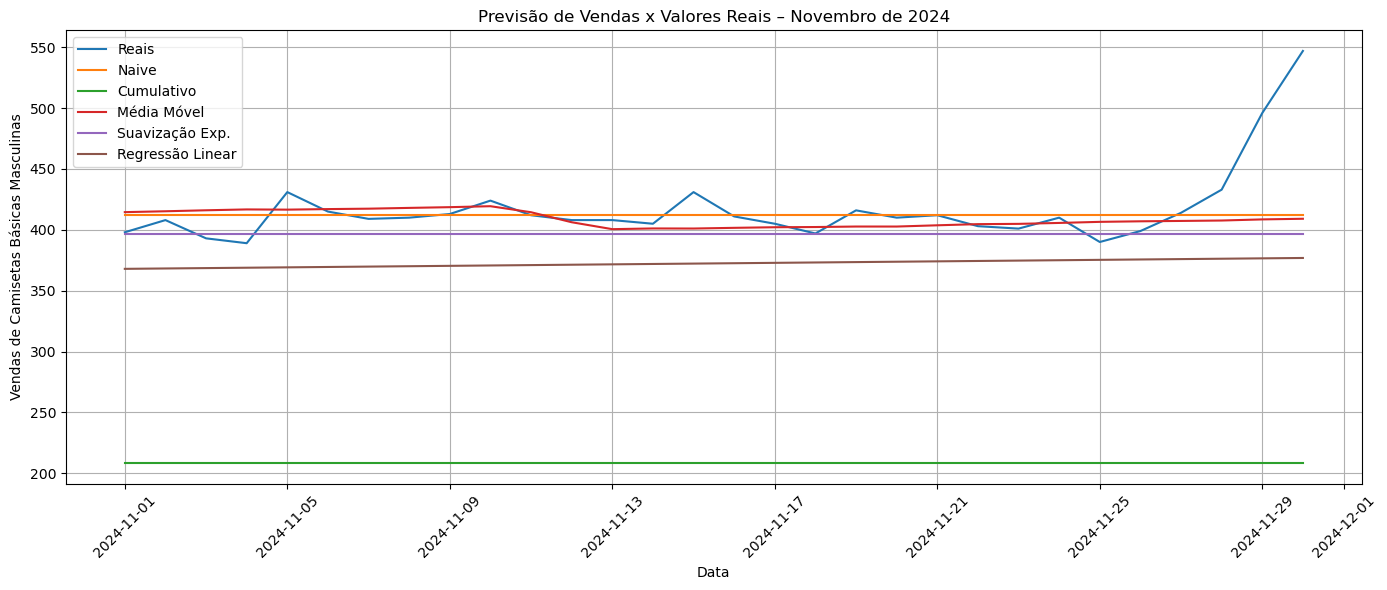

In [17]:
from pandas import read_excel, to_datetime, date_range, Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# === 1. Carregar dados ===
path3 = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\25.04.22.Dados.xlsx"
df3 = read_excel(path3, sheet_name="2025.04.22")
df3['Timestamp'] = to_datetime(df3['Timestamp'])
df3 = df3.sort_values('Timestamp')
df3.set_index('Timestamp', inplace=True)

# === 2. Separar treino e criar coluna 'Dia' ===
df_treino = df3[df3.index < '2024-11-01'].copy()
df3['Dia'] = (df3.index - df3.index.min()).days + 1
df_treino['Dia'] = (df_treino.index - df3.index.min()).days + 1

# === 3. Datas de previsão: apenas novembro ===
datas_novembro = date_range(start="2024-11-01", end="2024-11-30", freq='D')

# === 4. Modelos de previsão ===

# Naive
ultimo_valor = df_treino['Camisetas_básicas_masculinas'].iloc[-1]
previsao_naive = Series(ultimo_valor, index=datas_novembro)

# Cumulativo
media_diaria_total = df_treino['Camisetas_básicas_masculinas'].mean()
previsao_cumulativa = Series(media_diaria_total, index=datas_novembro)

# Média Móvel
k = 30
serie_extendida = df_treino['Camisetas_básicas_masculinas'].copy().astype(float)
previsoes_mm = []
for Timestamp in datas_novembro:
    media_movel = serie_extendida.iloc[-k:].mean()
    previsoes_mm.append(media_movel)
    serie_extendida.loc[Timestamp] = media_movel
previsao_mm = Series(previsoes_mm, index=datas_novembro)

# Suavização Exponencial
alpha = 0.3
serie_exp_real = df_treino['Camisetas_básicas_masculinas'].copy().astype(float)
S_anterior = serie_exp_real.ewm(alpha=alpha, adjust=False).mean().iloc[-1]
previsoes_exp = []
for Timestamp in datas_novembro:
    S_novo = S_anterior  # constante
    previsoes_exp.append(S_novo)
    S_anterior = S_novo
previsao_exp = Series(previsoes_exp, index=datas_novembro)

# Regressão Linear
X_treino = df_treino[['Dia']]
y_treino = df_treino['Camisetas_básicas_masculinas']
modelo_rl = LinearRegression()
modelo_rl.fit(X_treino, y_treino)

dias_novembro = (datas_novembro - df3.index.min()).days + 1
X_novembro = DataFrame({'Dia': dias_novembro})
previsao_rl = Series(modelo_rl.predict(X_novembro), index=datas_novembro)

# === 5. Valores reais de novembro ===
valores_reais_nov = df3['Camisetas_básicas_masculinas'].loc['2024-11-01':'2024-11-30']

# === 6. DataFrame final de previsões ===
df_previsoes_nov = DataFrame({
    'Reais': valores_reais_nov,
    'Naive': previsao_naive,
    'Cumulativo': previsao_cumulativa,
    'Média Móvel': previsao_mm,
    'Suavização Exp.': previsao_exp,
    'Regressão Linear': previsao_rl
})

# === 7. Plotar gráfico de novembro ===
plt.figure(figsize=(14, 6))
for coluna in df_previsoes_nov.columns:
    plt.plot(df_previsoes_nov.index, df_previsoes_nov[coluna], label=coluna)

plt.title("Previsão de Vendas x Valores Reais – Novembro de 2024")
plt.xlabel("Data")
plt.ylabel("Vendas de Camisetas Básicas Masculinas")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### FUNDAMENTAÇÃO TEÓRICA

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Seleciona os dados reais de novembro
reais_novembro = df3.loc['2024-11-01':'2024-11-30', 'Camisetas_básicas_masculinas']

# Inicializa um dicionário para armazenar os erros
erros_modelos = {}

for modelo in df_previsoes.columns:
    previsoes = df_previsoes.loc['2024-11-01':'2024-11-30', modelo]
    
    # Alinha os índices
    previsoes = previsoes.loc[reais_novembro.index]
    
    # Cálculo das métricas
    mad = mean_absolute_error(reais_novembro, previsoes)  # MAD
    rmse = np.sqrt(mean_squared_error(reais_novembro, previsoes))  # RMSE
    mape = np.mean(np.abs((reais_novembro - previsoes) / reais_novembro)) * 100  # MAPE
    
    erros_modelos[modelo] = {
        'MAD': mad,
        'RMSE': rmse,
        'MAPE (%)': mape
    }

# Exibindo resultados
print("\n### Erros de Previsão - Novembro 2024 ###")
for modelo, erros in erros_modelos.items():
    print(f"\nModelo: {modelo}")
    for nome_erro, valor in erros.items():
        print(f"{nome_erro}: {valor:.2f}")


### Erros de Previsão - Novembro 2024 ###

Modelo: Naive
MAD: 15.40
RMSE: 31.07
MAPE (%): 3.38

Modelo: Cumulativo
MAD: 208.31
RMSE: 210.56
MAPE (%): 49.78

Modelo: Média Móvel
MAD: 16.71
RMSE: 32.22
MAPE (%): 3.68

Modelo: Suavização Exp.
MAD: 21.07
RMSE: 36.58
MAPE (%): 4.65


### PREVISÃO DE DEZEMBRO

In [13]:
df_previsoes = DataFrame({
    'Naive': previsao_naive,
})

# Exibir as previsões completas de novembro e dezembro


print("\nPrevisões para Dezembro/2024:")
print(df_previsoes.tail(31))


Previsões para Dezembro/2024:
            Naive
2024-12-01    412
2024-12-02    412
2024-12-03    412
2024-12-04    412
2024-12-05    412
2024-12-06    412
2024-12-07    412
2024-12-08    412
2024-12-09    412
2024-12-10    412
2024-12-11    412
2024-12-12    412
2024-12-13    412
2024-12-14    412
2024-12-15    412
2024-12-16    412
2024-12-17    412
2024-12-18    412
2024-12-19    412
2024-12-20    412
2024-12-21    412
2024-12-22    412
2024-12-23    412
2024-12-24    412
2024-12-25    412
2024-12-26    412
2024-12-27    412
2024-12-28    412
2024-12-29    412
2024-12-30    412
2024-12-31    412


### REGRESSÃO LINEAR

C:\Users\Jean Nery\anaconda3\envs\faculdade\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


         Data  Previsao_vendas
0  2024-11-01       372.620637
1  2024-11-02       372.935672
2  2024-11-03       373.250708
3  2024-11-04       373.565744
4  2024-11-05       373.880779
5  2024-11-06       374.195815
6  2024-11-07       374.510850
7  2024-11-08       374.825886
8  2024-11-09       375.140921
9  2024-11-10       375.455957
10 2024-11-11       375.770993
11 2024-11-12       376.086028
12 2024-11-13       376.401064
13 2024-11-14       376.716099
14 2024-11-15       377.031135
15 2024-11-16       377.346170
16 2024-11-17       377.661206
17 2024-11-18       377.976242
18 2024-11-19       378.291277
19 2024-11-20       378.606313
20 2024-11-21       378.921348
21 2024-11-22       379.236384
22 2024-11-23       379.551419
23 2024-11-24       379.866455
24 2024-11-25       380.181491
25 2024-11-26       380.496526
26 2024-11-27       380.811562
27 2024-11-28       381.126597
28 2024-11-29       381.441633
29 2024-11-30       381.756668


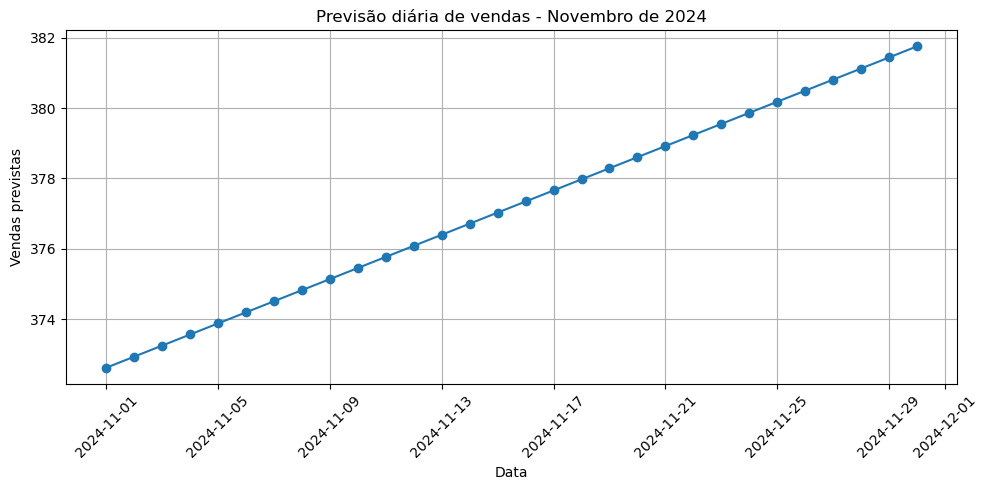

In [2]:
from pandas import to_datetime, read_excel, date_range, DataFrame
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Carregar o arquivo Excel
path4 = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\25.04.22.Dados.xlsx"
df4 = read_excel(path4, sheet_name="2025.04.22")

# 2. Converter a coluna de datas
df4['Timestamp'] = to_datetime(df4['Timestamp'])

# 3. Ordenar e criar coluna com dias desde o início
df4 = df4.sort_values('Timestamp')
df4['Dia'] = (df4['Timestamp'] - df4['Timestamp'].min()).dt.days + 1

# 4. Preparar os dados para regressão
X = df4[['Dia']]
y = df4['Camisetas_básicas_masculinas']

# 5. Treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# 6. Criar datas para o mês de novembro de 2024
novembro_2024 = date_range(start="2024-11-01", end="2024-11-30", freq='D')
dias_novembro = (novembro_2024 - df4['Timestamp'].min()).days + 1

# 7. Prever as vendas para cada dia
previsoes = modelo.predict(dias_novembro.to_numpy().reshape(-1, 1))

# 8. Montar DataFrame com as previsões
df_previsao = DataFrame({
    'Data': novembro_2024,
    'Previsao_vendas': previsoes
})

# 9. Exibir as previsões
print(df_previsao)

# (Opcional) 10. Plotar as previsões
plt.figure(figsize=(10, 5))
plt.plot(df_previsao['Data'], df_previsao['Previsao_vendas'], marker='o')
plt.title("Previsão diária de vendas - Novembro de 2024")
plt.xlabel("Data")
plt.ylabel("Vendas previstas")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### FUNDAMENTAÇÃO TEÓRICA - REGRESSÃO LINEAR

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

dados_novembro_real = df4[(df4['Timestamp'] >= '2024-11-01') & (df4['Timestamp'] <= '2024-11-30')].copy()
valores_reais = dados_novembro_real['Camisetas_básicas_masculinas'].values

# Certificar-se de que os dados estão alinhados
if len(valores_reais) == len(previsoes):
    # === 7. Calcular as métricas de erro ===
    mad = mean_absolute_error(valores_reais, previsoes)
    rmse = np.sqrt(mean_squared_error(valores_reais, previsoes))
    mape = np.mean(np.abs((valores_reais - previsoes) / valores_reais)) * 100

    # === 8. Exibir os resultados ===
    print("\n### Erros de Previsão - Novembro 2024 ###")
    print("Modelo: Regressão Linear Simples")
    print(f"MAD: {mad:.5f}")
    print(f"RMSE: {rmse:.5f}")
    print(f"MAPE (%): {mape:.5f}")
else:
    print("Erro: número de previsões não bate com o número de valores reais.")


### Erros de Previsão - Novembro 2024 ###
Modelo: Regressão Linear Simples
MAD: 39.41135
RMSE: 49.33715
MAPE (%): 9.06917


### KVV E SVM


--- Modelo K-Nearest Neighbors (KNN) ---
2024-11-01    396.0
2024-11-02    396.0
2024-11-03    396.0
2024-11-04    396.0
2024-11-05    396.0
2024-11-06    396.0
2024-11-07    396.0
2024-11-08    396.0
2024-11-09    396.0
2024-11-10    396.0
2024-11-11    396.0
2024-11-12    396.0
2024-11-13    396.0
2024-11-14    396.0
2024-11-15    396.0
2024-11-16    396.0
2024-11-17    396.0
2024-11-18    396.0
2024-11-19    396.0
2024-11-20    396.0
2024-11-21    396.0
2024-11-22    396.0
2024-11-23    396.0
2024-11-24    396.0
2024-11-25    396.0
2024-11-26    396.0
2024-11-27    396.0
2024-11-28    396.0
2024-11-29    396.0
2024-11-30    396.0
Freq: D, dtype: float64

--- Modelo Support Vector Regression (SVR) ---
2024-11-01    393.797989
2024-11-02    394.141892
2024-11-03    394.482406
2024-11-04    394.819501
2024-11-05    395.153150
2024-11-06    395.483326
2024-11-07    395.810001
2024-11-08    396.133147
2024-11-09    396.452738
2024-11-10    396.768747
2024-11-11    397.081146
2024-11-12 

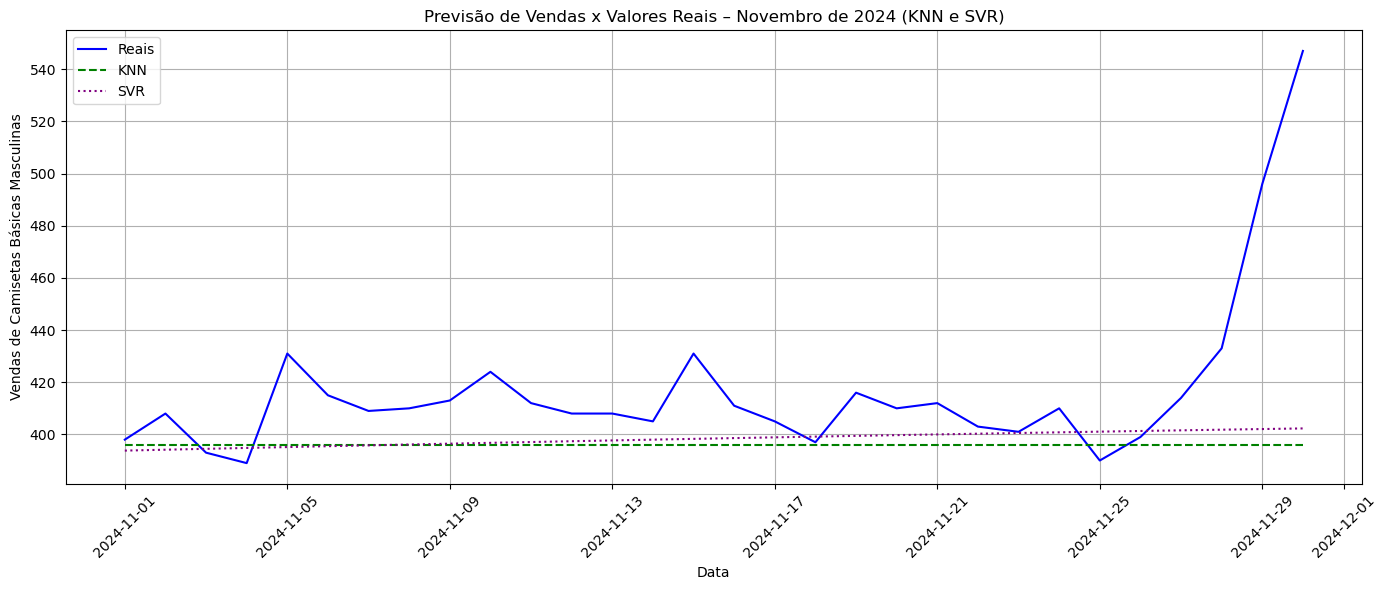


--- Previsões para Dezembro de 2024 ---

Previsões para Dezembro/2024 (Modelo KNN):
2024-12-01    396.0
2024-12-02    396.0
2024-12-03    396.0
2024-12-04    396.0
2024-12-05    396.0
2024-12-06    396.0
2024-12-07    396.0
2024-12-08    396.0
2024-12-09    396.0
2024-12-10    396.0
2024-12-11    396.0
2024-12-12    396.0
2024-12-13    396.0
2024-12-14    396.0
2024-12-15    396.0
2024-12-16    396.0
2024-12-17    396.0
2024-12-18    396.0
2024-12-19    396.0
2024-12-20    396.0
2024-12-21    396.0
2024-12-22    396.0
2024-12-23    396.0
2024-12-24    396.0
2024-12-25    396.0
2024-12-26    396.0
2024-12-27    396.0
2024-12-28    396.0
2024-12-29    396.0
2024-12-30    396.0
2024-12-31    396.0
Freq: D, dtype: float64

Previsões para Dezembro/2024 (Modelo SVR):
2024-12-01    402.532413
2024-12-02    402.763315
2024-12-03    402.990088
2024-12-04    403.212710
2024-12-05    403.431162
2024-12-06    403.645424
2024-12-07    403.855477
2024-12-08    404.061301
2024-12-09    404.262878
20

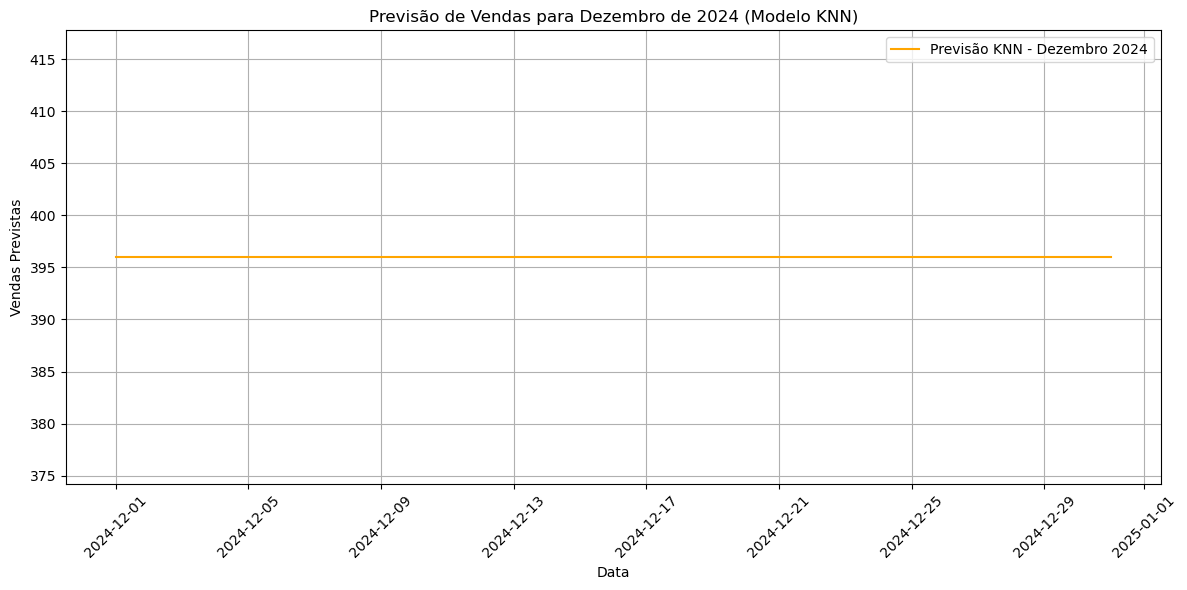

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# --- 1. Carregar e preparar os dados ---
path5 = r"C:\\Users\\Jean Nery\\OneDrive\\Documentos\\Faculdade\\9º PERÍODO\\ANÁLISE PREDITIVA\\25.04.22.Dados.xlsx"
df5 = pd.read_excel(path5, sheet_name="2025.04.22")

df5['Timestamp'] = pd.to_datetime(df5['Timestamp'])
df5 = df5.sort_values('Timestamp')
df5.set_index('Timestamp', inplace=True)

# Criar a coluna 'Dia' como uma variável numérica (dias desde o início)
df5['Dia'] = (df5.index - df5.index.min()).days + 1

# Separar os dados de treinamento (até outubro de 2024)
df_treino_ml = df5[df5.index < '2024-11-01'].copy()
X_treino_ml = df_treino_ml[['Dia']]
y_treino_ml = df_treino_ml['Camisetas_básicas_masculinas']

# Definir o período de previsão para novembro de 2024
datas_novembro_ml = pd.date_range(start="2024-11-01", end="2024-11-30", freq='D')
dias_novembro_ml = (datas_novembro_ml - df5.index.min()).days + 1
X_novembro_ml = pd.DataFrame({'Dia': dias_novembro_ml})

# Obter os valores reais de novembro para validação
valores_reais_nov_ml = df5['Camisetas_básicas_masculinas'].loc['2024-11-01':'2024-11-30']

# --- 2. Implementar e treinar o modelo KNN ---
print("\n--- Modelo K-Nearest Neighbors (KNN) ---")
knn_model = KNeighborsRegressor(n_neighbors=5) # Você pode ajustar 'n_neighbors' (k)
knn_model.fit(X_treino_ml, y_treino_ml)
previsao_knn = pd.Series(knn_model.predict(X_novembro_ml), index=datas_novembro_ml)
print(previsao_knn)

# --- 3. Implementar e treinar o modelo SVR ---
print("\n--- Modelo Support Vector Regression (SVR) ---")
# Recomenda-se ajustar os hiperparâmetros (C, epsilon, kernel) para otimização
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_treino_ml, y_treino_ml)
previsao_svr = pd.Series(svr_model.predict(X_novembro_ml), index=datas_novembro_ml)
print(previsao_svr)

# --- 4. Consolidar previsões para análise de novembro ---
df_previsoes_nov_ml_resultados = pd.DataFrame({
    'Reais': valores_reais_nov_ml,
    'KNN': previsao_knn,
    'SVR': previsao_svr
})

# --- 5. Calcular e exibir as métricas de erro para KNN e SVR (Novembro) ---
print("\n### Erros de Previsão - Novembro 2024 (KNN e SVR) ###")

erros_ml_modelos = {}

for modelo_name, previsoes_series in {'KNN': previsao_knn, 'SVR': previsao_svr}.items():
    # Garantir que os índices das previsões e dos valores reais estão alinhados
    previsoes_series = previsoes_series.loc[valores_reais_nov_ml.index]

    mad = mean_absolute_error(valores_reais_nov_ml, previsoes_series)
    rmse = np.sqrt(mean_squared_error(valores_reais_nov_ml, previsoes_series))
    mape = np.mean(np.abs((valores_reais_nov_ml - previsoes_series) / valores_reais_nov_ml)) * 100

    erros_ml_modelos[modelo_name] = {
        'MAD': mad,
        'RMSE': rmse,
        'MAPE (%)': mape
    }

for modelo, erros in erros_ml_modelos.items():
    print(f"\nModelo: {modelo}")
    for nome_erro, valor in erros.items():
        print(f"{nome_erro}: {valor:.2f}")

# --- 6. Plotar as previsões de novembro (KNN e SVR vs. Reais) ---
plt.figure(figsize=(14, 6))
plt.plot(df_previsoes_nov_ml_resultados.index, df_previsoes_nov_ml_resultados['Reais'], label='Reais', color='blue')
plt.plot(df_previsoes_nov_ml_resultados.index, df_previsoes_nov_ml_resultados['KNN'], label='KNN', color='green', linestyle='--')
plt.plot(df_previsoes_nov_ml_resultados.index, df_previsoes_nov_ml_resultados['SVR'], label='SVR', color='purple', linestyle=':')

plt.title("Previsão de Vendas x Valores Reais – Novembro de 2024 (KNN e SVR)")
plt.xlabel("Data")
plt.ylabel("Vendas de Camisetas Básicas Masculinas")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- 7. Previsão para Dezembro de 2024 (usando o melhor modelo ML) ---

# Definir o período de previsão para dezembro de 2024
datas_dezembro_ml = pd.date_range(start="2024-12-01", end="2024-12-31", freq='D')
dias_dezembro_ml = (datas_dezembro_ml - df5.index.min()).days + 1
X_dezembro_ml = pd.DataFrame({'Dia': dias_dezembro_ml})

print("\n--- Previsões para Dezembro de 2024 ---")

# Previsão do KNN para dezembro
previsao_dezembro_knn_final = pd.Series(knn_model.predict(X_dezembro_ml), index=datas_dezembro_ml)
print("\nPrevisões para Dezembro/2024 (Modelo KNN):")
print(previsao_dezembro_knn_final)

# Previsão do SVM para dezembro
previsao_dezembro_svr_final = pd.Series(svr_model.predict(X_dezembro_ml), index=datas_dezembro_ml)
print("\nPrevisões para Dezembro/2024 (Modelo SVR):")
print(previsao_dezembro_svr_final)

# Plotar as previsões de dezembro do modelo escolhido
plt.figure(figsize=(12, 6))
plt.plot(previsao_dezembro_knn_final.index, previsao_dezembro_knn_final.values, label='Previsão KNN - Dezembro 2024', color='orange') # Ou previsao_dezembro_svr_final
plt.title("Previsão de Vendas para Dezembro de 2024 (Modelo KNN)")
plt.xlabel("Data")
plt.ylabel("Vendas Previstas")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Regressão linear RETIFICADA


--- Modelo de Regressão Linear Simples ---

--- Modelo de Regressão Linear Dinâmica ---

### Previsões para Novembro/2024 (Regressão Linear Simples e Dinâmica) ###
            Reais  Regressão Linear Simples  Regressão Linear Dinâmica
2024-11-01    398                368.024887                 402.354293
2024-11-02    408                368.333344                 394.992045
2024-11-03    393                368.641800                 389.389527
2024-11-04    389                368.950257                 385.143132
2024-11-05    431                369.258714                 381.941822
2024-11-06    415                369.567171                 379.545899
2024-11-07    409                369.875628                 377.770642
2024-11-08    410                370.184085                 376.473697
2024-11-09    413                370.492542                 375.545358
2024-11-10    424                370.800999                 374.901083
2024-11-11    412                371.109455           

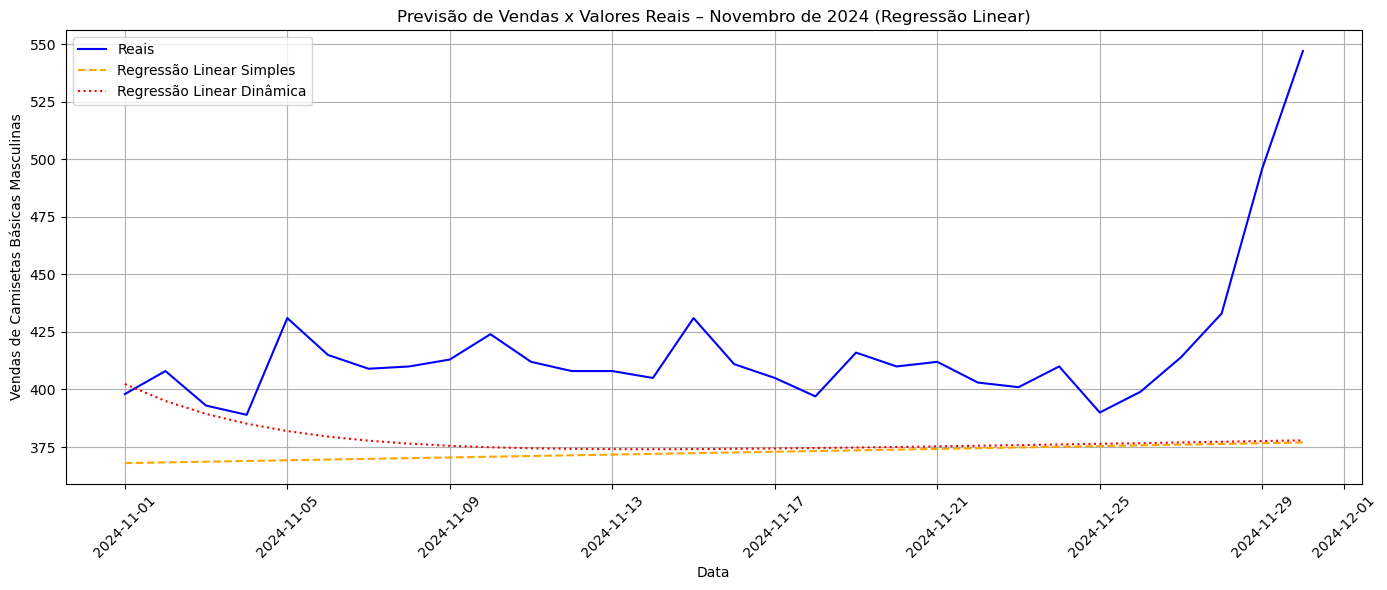


--- Previsões para Dezembro de 2024 (Regressão Linear Dinâmica) ---

Previsões para Dezembro/2024 (Regressão Linear Dinâmica):
2024-12-01    508.525302
2024-12-02    478.946209
2024-12-03    456.222448
2024-12-04    438.781697
2024-12-05    425.412256
2024-12-06    415.180341
2024-12-07    407.366335
2024-12-08    401.415674
2024-12-09    396.900984
2024-12-10    393.492915
2024-12-11    390.937655
2024-12-12    389.039607
2024-12-13    387.648032
2024-12-14    386.646769
2024-12-15    385.946295
2024-12-16    385.477623
2024-12-17    385.187588
2024-12-18    385.035216
2024-12-19    384.988935
2024-12-20    385.024412
2024-12-21    385.122894
2024-12-22    385.269932
2024-12-23    385.454388
2024-12-24    385.667680
2024-12-25    385.903194
2024-12-26    386.155835
2024-12-27    386.421673
2024-12-28    386.697682
2024-12-29    386.981528
2024-12-30    387.271415
2024-12-31    387.565957
Freq: D, dtype: float64


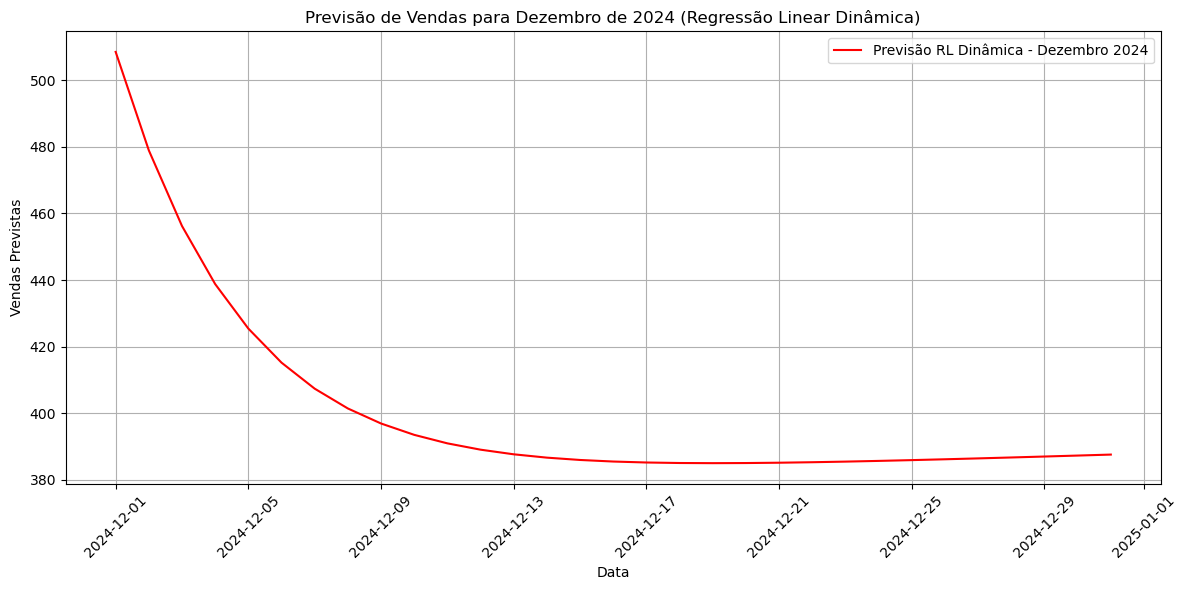

In [9]:
from pandas import read_excel, to_datetime, date_range, Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. Carregar os dados (mantendo df4 e path4) ---
path4 = r"C:\\Users\\Jean Nery\\OneDrive\\Documentos\\Faculdade\\9º PERÍODO\\ANÁLISE PREDITIVA\\25.04.22.Dados.xlsx" 
df4 = read_excel(path4, sheet_name="2025.04.22")

df4['Timestamp'] = to_datetime(df4['Timestamp'])
df4 = df4.sort_values('Timestamp')
df4.set_index('Timestamp', inplace=True)

# Criar a coluna 'Dia' como uma variável numérica (dias desde o início)
df4['Dia'] = (df4.index - df4.index.min()).days + 1

# --- 2. Separar treino e definir datas de previsão ---
df_treino_reg = df4[df4.index < '2024-11-01'].copy()

# Criar a variável 'Vendas_Dia_Anterior' para a Regressão Dinâmica
df_treino_reg['Vendas_Dia_Anterior'] = df_treino_reg['Camisetas_básicas_masculinas'].shift(1)
df_treino_reg.dropna(subset=['Vendas_Dia_Anterior'], inplace=True) # Remover a primeira linha com NaN

# Definir as datas de previsão para novembro (para validação)
datas_novembro_reg = date_range(start="2024-11-01", end="2024-11-30", freq='D')
dias_novembro_reg = (datas_novembro_reg - df4.index.min()).days + 1
X_novembro_reg_frame = DataFrame({'Dia': dias_novembro_reg}, index=datas_novembro_reg)

# Obter os valores reais de novembro para validação
valores_reais_nov_reg = df4['Camisetas_básicas_masculinas'].loc['2024-11-01':'2024-11-30']

# --- 3. Modelagem: Regressão Linear Simples ---
print("\n--- Modelo de Regressão Linear Simples ---")
X_simples_treino = df_treino_reg[['Dia']]
y_simples_treino = df_treino_reg['Camisetas_básicas_masculinas']

modelo_rl_simples = LinearRegression()
modelo_rl_simples.fit(X_simples_treino, y_simples_treino)
previsao_rl_simples = Series(modelo_rl_simples.predict(X_novembro_reg_frame[['Dia']]), index=datas_novembro_reg)

# --- 4. Modelagem: Regressão Linear Dinâmica ---
print("\n--- Modelo de Regressão Linear Dinâmica ---")
X_dinamica_treino = df_treino_reg[['Dia', 'Vendas_Dia_Anterior']]
y_dinamica_treino = df_treino_reg['Camisetas_básicas_masculinas']

modelo_rl_dinamica = LinearRegression()
modelo_rl_dinamica.fit(X_dinamica_treino, y_dinamica_treino)

# Previsão para novembro com RL Dinâmica (iterativa)
previsoes_dinamicas_nov = []
ultima_venda_treino = df_treino_reg['Camisetas_básicas_masculinas'].iloc[-1] # Última venda real de outubro

for i, current_date in enumerate(datas_novembro_reg):
    current_dia = X_novembro_reg_frame.loc[current_date, 'Dia']
    
    if i == 0:
        venda_dia_anterior = ultima_venda_treino
    else:
        venda_dia_anterior = previsoes_dinamicas_nov[-1]
        
    prediction_input = DataFrame([[current_dia, venda_dia_anterior]], columns=['Dia', 'Vendas_Dia_Anterior'])
    previsao_atual = modelo_rl_dinamica.predict(prediction_input)[0]
    previsoes_dinamicas_nov.append(previsao_atual)

previsao_rl_dinamica_nov = Series(previsoes_dinamicas_nov, index=datas_novembro_reg)

# --- 5. Consolidar previsões para análise de novembro ---
df_previsoes_nov_reg_resultados = DataFrame({
    'Reais': valores_reais_nov_reg,
    'Regressão Linear Simples': previsao_rl_simples,
    'Regressão Linear Dinâmica': previsao_rl_dinamica_nov
})

# --- IMPRIMIR PREVISÕES DE NOVEMBRO LADO A LADO ---
print("\n### Previsões para Novembro/2024 (Regressão Linear Simples e Dinâmica) ###")
print(df_previsoes_nov_reg_resultados)

# --- Continuação do código para cálculo de métricas e plotagem (como anteriormente) ---
# --- 6. Calcular e exibir as métricas de erro (Novembro) ---
print("\n### Erros de Previsão - Novembro 2024 (Regressão Linear Simples e Dinâmica) ###")

erros_reg_modelos = {}

for modelo_name, previsoes_series in {'Regressão Linear Simples': previsao_rl_simples, 'Regressão Linear Dinâmica': previsao_rl_dinamica_nov}.items():
    previsoes_series = previsoes_series.loc[valores_reais_nov_reg.index] # Alinhar índices

    mad = mean_absolute_error(valores_reais_nov_reg, previsoes_series)
    rmse = np.sqrt(mean_squared_error(valores_reais_nov_reg, previsoes_series))
    mape = np.mean(np.abs((valores_reais_nov_reg - previsoes_series) / valores_reais_nov_reg)) * 100

    erros_reg_modelos[modelo_name] = {
        'MAD': mad,
        'RMSE': rmse,
        'MAPE (%)': mape
    }

for modelo, erros in erros_reg_modelos.items():
    print(f"\nModelo: {modelo}")
    for nome_erro, valor in erros.items():
        print(f"{nome_erro}: {valor:.2f}")

# --- 7. Plotar as previsões de novembro (RL Simples e Dinâmica vs. Reais) ---
plt.figure(figsize=(14, 6))
plt.plot(df_previsoes_nov_reg_resultados.index, df_previsoes_nov_reg_resultados['Reais'], label='Reais', color='blue')
plt.plot(df_previsoes_nov_reg_resultados.index, df_previsoes_nov_reg_resultados['Regressão Linear Simples'], label='Regressão Linear Simples', color='orange', linestyle='--')
plt.plot(df_previsoes_nov_reg_resultados.index, df_previsoes_nov_reg_resultados['Regressão Linear Dinâmica'], label='Regressão Linear Dinâmica', color='red', linestyle=':')

plt.title("Previsão de Vendas x Valores Reais – Novembro de 2024 (Regressão Linear)")
plt.xlabel("Data")
plt.ylabel("Vendas de Camisetas Básicas Masculinas")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- 8. Previsão para Dezembro de 2024 (usando o melhor modelo de Regressão Linear) ---
# Com base nos erros de novembro, você deve escolher qual modelo (RL Simples ou RL Dinâmica) é o melhor.
# Para este exemplo, vou usar a RL Dinâmica como o "best" para demonstrar a previsão de dezembro.
# É crucial que você analise as métricas geradas para tomar essa decisão.

datas_dezembro_reg = date_range(start="2024-12-01", end="2024-12-31", freq='D')
dias_dezembro_reg = (datas_dezembro_reg - df4.index.min()).days + 1
X_dezembro_reg_plot = DataFrame({'Dia': dias_dezembro_reg}, index=datas_dezembro_reg)

print("\n--- Previsões para Dezembro de 2024 (Regressão Linear Dinâmica) ---")

previsoes_dinamicas_dez = []
ultima_venda_nov = valores_reais_nov_reg.iloc[-1] # Última venda real de novembro

for i, current_date in enumerate(datas_dezembro_reg):
    current_dia = X_dezembro_reg_plot.loc[current_date, 'Dia']
    
    if i == 0:
        venda_dia_anterior = ultima_venda_nov
    else:
        venda_dia_anterior = previsoes_dinamicas_dez[-1]
        
    prediction_input = DataFrame([[current_dia, venda_dia_anterior]], columns=['Dia', 'Vendas_Dia_Anterior'])
    previsao_atual = modelo_rl_dinamica.predict(prediction_input)[0]
    previsoes_dinamicas_dez.append(previsao_atual)

previsao_rl_dinamica_dez_final = Series(previsoes_dinamicas_dez, index=datas_dezembro_reg)

print("\nPrevisões para Dezembro/2024 (Regressão Linear Dinâmica):")
print(previsao_rl_dinamica_dez_final)

# Plotar as previsões de dezembro do modelo escolhido
plt.figure(figsize=(12, 6))
plt.plot(previsao_rl_dinamica_dez_final.index, previsao_rl_dinamica_dez_final.values, label='Previsão RL Dinâmica - Dezembro 2024', color='red')
plt.title("Previsão de Vendas para Dezembro de 2024 (Regressão Linear Dinâmica)")
plt.xlabel("Data")
plt.ylabel("Vendas Previstas")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()